In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Lab 5 -- Nebular HII regions

In this lab we will explore the physics of photoionized regions, which are seen surrounding newly formed stars or white dwarfs.

### 1. Strömgren sphere of ionized gas surrounding a massive star

Consider a newly formed massive star radiating a total ionizing ($h\nu > 13.6 \, \rm eV$) photon rate of $Q_*$, which is surrounded by a medium with hydrogen number density $n_H$. 

Assume that within some spherical volume (the "Strömgren sphere"), the hydrogen atoms absorb (and are ionized by) every single one of these photons, resulting in an entirely ionized gas, while outside of this volume the gas is entirely neutral. By setting the ionization and recombination rates equal within that volume, calculate its radius $R_{\rm st}$ (the "Strömgren radius"). 

$[\textit{Hint: } \textrm{What are the units of Q? What about the units of recombination rate? If every photon in the inner region results in an ionization what is the ionization rate?]}$

Like in the pre-lab video, you can write the result in terms of the hydrogen recombination coefficient, $\alpha_H$. Do your scalings of the Strömgren radius with $Q_*$ and $n_H$ make sense?

### 2. Typical size of a photoionized nebula

Assuming a star of effective (surface) temperature $T = 3\times10^4$ K and radius $R = 2\times10^{11}$ cm, use the approximate expression from the pre-lab video to calculate the integrated ionizing photon rate $Q_*$ for hydrogen, with ionization energy of $h \nu_i = 13.6$ eV.

Then assuming $n_H = 10^2 \, \rm cm^{-3}$ and $\alpha_H = 3.3\times10^{-13} \, \rm cm^3 \, \rm s^{-1}$, calculate the Strömgren radius. How large is the ionized nebula compared to the size of the massive star? How about compared to the width of a Galactic spiral arm of $\simeq 1$ kpc?


### 3. Thickness of the transition from ionized to neutral

The thickness of the boundary where the gas goes from nearly fully ionized to neutral can be estimated as the mean free path of an ionizing photon in the neutral region. Using $\sigma_0 = 6.3 \times 10^{-18} \, \rm cm^2$, calculate this width and compare with your value of $R_{\rm st}$ from part 2.

How does the result compare to the assumption above of a very sharp transition from fully ionized to neutral gas?

### 4. Relative size of hydrogen and helium ionization zones

Using the Strömgren sphere model, calculate the ratio of the radius of a helium to hydrogen ionization zone in terms of their relative number of ionizing photons $Q_{\rm H}$ and $Q_{\rm He}$ and composition parameters $X$ and $Y$.

Calculate this ratio for the first ionization state of helium for the assumed massive star properties above, with $n_H = 10^2$ cm$^{-3}$, $X = 3/4$, $Y = 1/4$, and noting that the ionization energy is $h \nu_i = 24.6$ eV.

### 5. Comparison to output from a numerical calculation with the Cloudy code

Compare your results with the same problem as run using the Cloudy photoionization code, which tracks in detail the ionization state and temperature of the nebula. 

1) Fill in your values for the Strömgren radius below to plot your expected locations for a drop from full to zero ionization on the plot below.

2) How well does the Strömgren sphere assumption work?

Surprisingly well!

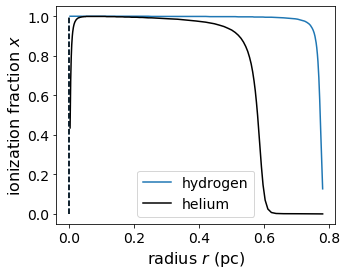

In [36]:
# FILL IN YOUR VALUES FOR RSTROM HERE
# rstrom_H = HYDROGEN VALUE
# rstrom_He = HELIUM VALUE
rstrom_H = 0
rstrom_He = 0

# load Cloudy output data
r,xH,xHe,xHe2 = np.load('cloudy_hii_example_Rx.npy')

# make a plot of ionization fractions
plt.figure(figsize=(5,4))
plt.plot(r/3.09e18,xH,label='hydrogen',color='C0')
plt.plot(r/3.09e18,xHe,label='helium',color='k')
plt.plot(rstrom_H/3.09e18+np.zeros(50),np.arange(50)/49.,color='C0',linestyle='--')
plt.plot(rstrom_He/3.09e18+np.zeros(50),np.arange(50)/49.,color='k',linestyle='--')
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlabel('radius $r$ (pc)',fontsize=16); plt.ylabel(r'ionization fraction $x$',fontsize=16)
plt.legend(frameon=True,fontsize=14)

### 6. Nebular spectrum

Cloudy also calculates the observed spectrum from the nebula, including both the initial stellar spectrum (here a Planck spectrum $B_\nu (T)$ with $T = 3\times10^4$ K) and the additional radiation from the ionized gas in the nebula.

What are the major differences between the incident (stellar) spectrum, and the observed one from the entire nebula? Why is the high energy flux of the star greatly reduced in the observed spectrum? Where did that energy go?

Comment on any radiation processes (emission or absorption) that you think might be contributing to the shape of the observed nebula spectrum.


(1000000000000.0, 2e+16)

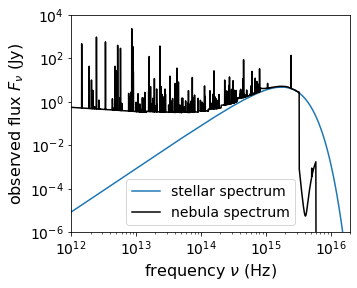

In [43]:
# load Cloudy output data
nu,Fnu_trans,Fnu_diff,Fnu_inc = np.load('cloudy_hii_example_spec.npy')

# make a plot of the stellar (blue) and observed (black) spectra
plt.figure(figsize=(5,4))
plt.loglog(nu,Fnu_inc,label='stellar spectrum',color='C0')
plt.loglog(nu,Fnu_trans,label='nebula spectrum',color='k')
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlabel(r'frequency $\nu$ (Hz)',fontsize=16); plt.ylabel(r'observed flux $F_\nu$ (Jy)',fontsize=16)
plt.legend(frameon=True,fontsize=14)
plt.ylim(1e-6,1e4); plt.xlim(1e12,2e16)